## Help to answer question 22...

The last thing you did in Lab6 (i.e. before question 22) was:

Model run: DONE!!!


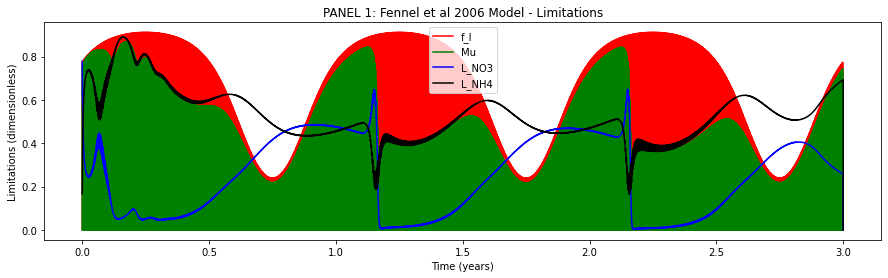

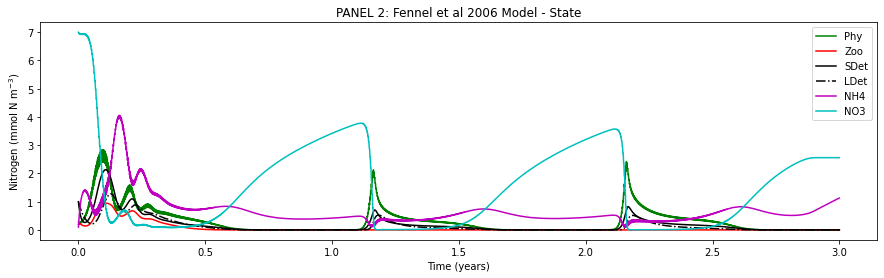

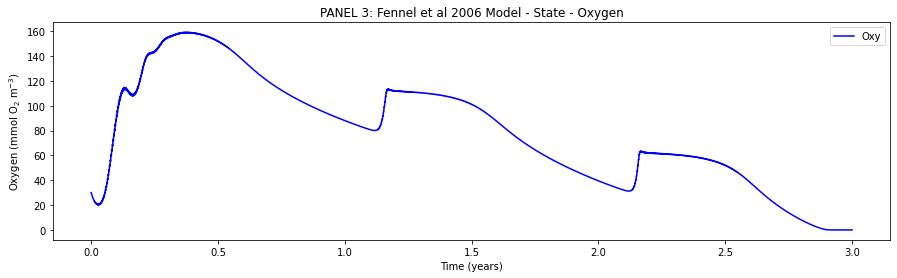

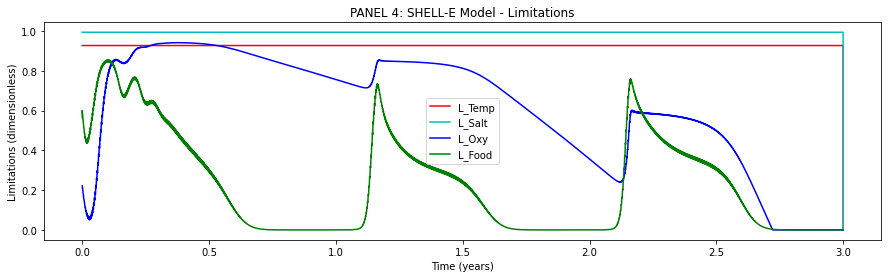

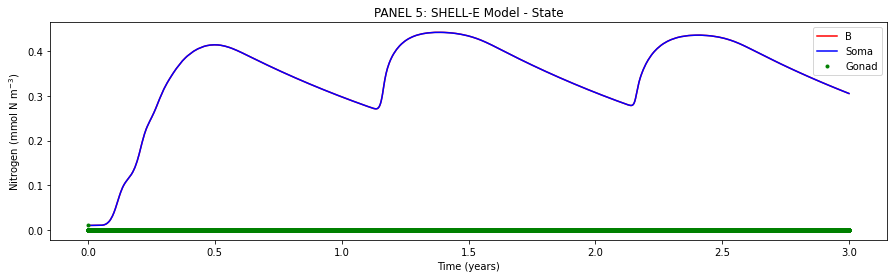

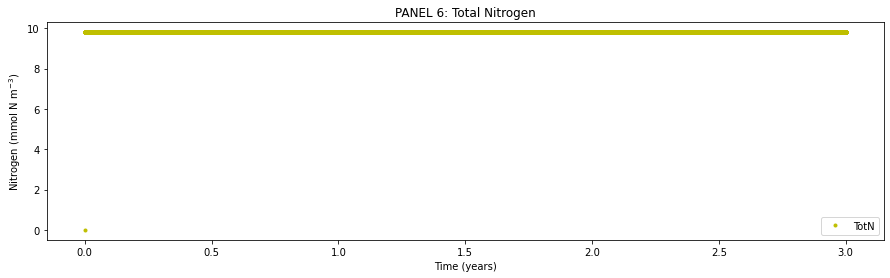

In [2]:
import model_NPZD2_SHELLE_pond_O2 as model

days, dt, par, InitCond = model.load_defaults()

par['X'] = 2000.# Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']

InitCond['n_muss'] = 4 * 10**7. # number of mussels in basin    
    
output = model.run(days,dt,InitCond,par)
model.plot(output)

Take a look at the model output by typing `output` in Spyder's console

In [3]:
output

{'time': array([0.00000000e+00, 1.00000913e-02, 2.00001827e-02, ...,
        1.09498000e+03, 1.09499000e+03, 1.09500000e+03]),
 'Phy': array([2.00000000e-01, 1.99632660e-01, 1.99314096e-01, ...,
        1.84543860e-05, 1.84267044e-05, 1.83990644e-05]),
 'Zoo': array([3.00000000e-01, 2.99903847e-01, 2.99469949e-01, ...,
        1.36994659e-27, 1.36857664e-27, 1.36720806e-27]),
 'SDet': array([1.00000000e+00, 9.97264149e-01, 9.94760248e-01, ...,
        7.17420708e-06, 7.18036603e-06, 7.18646498e-06]),
 'LDet': array([1.00000000e+00, 9.99084897e-01, 9.98171060e-01, ...,
        1.08792040e-08, 1.08683577e-08, 1.08575221e-08]),
 'NH4': array([0.1       , 0.10406572, 0.10834668, ..., 1.12895165, 1.12907393,
        1.1291962 ]),
 'NO3': array([7.        , 7.00004545, 6.99993108, ..., 2.55825943, 2.55825943,
        2.55825943]),
 'mu': array([0.00000000e+00, 7.40971112e-02, 1.46656021e-01, ...,
        1.18727112e-08, 1.18727583e-08, 0.00000000e+00]),
 'f_I': array([0.00000000e+00, 7.74569

You can see that oxygen concentration is stored in the variable `output` under the dictionary key `Oxy`, so to see our oxygen data, type:


In [4]:
output['Oxy']

array([30.       , 29.9724954, 29.9467868, ...,  0.       ,  0.       ,
        0.       ])

To calculate the mean of the oxygen array, type:

In [7]:
import numpy as np

np.mean(output['Oxy'])

79.24739186656709

The number of mussels used in this run is what you put in `InitCond['n_muss']`. Note that you can also get to this number in the `output` dictionary.... under the key `n_muss`. Take a look:

In [8]:
output['n_muss']

array([40000000., 40000000., 40000000., ..., 40000000., 40000000.,
       40000000.])

Or if you want just the first number:

In [9]:
output['n_muss'][0]

40000000.0

Those 2 numbers (i.e. `np.mean(output['Oxy'])` and `output['n_muss'][0]`) are **ONE** x y pair that you need to do your plot. However, that is only one pair, you need more pairs (5 or 6).

Lets create 3 pairs, by doing 3 model runs:

In [12]:
import model_NPZD2_SHELLE_pond_O2 as model

days, dt, par, InitCond = model.load_defaults()

par['X'] = 2000.# Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']

# 1st RUN
InitCond['n_muss'] = 4 * 10**7. # number of mussels in basin    
output_1 = model.run(days,dt,InitCond,par) # This saves the output of run1

# 2nd RUN
InitCond['n_muss'] = 4 * 10**8. # INCREASE the number of mussels in basin    
output_2 = model.run(days,dt,InitCond,par) # This saves the output of run2

# 3rd RUN
InitCond['n_muss'] = 4 * 10**9. # Further INCREASE the number of mussels in basin    
output_3 = model.run(days,dt,InitCond,par) # This saves the output of run3

Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!


Now lets do a plot

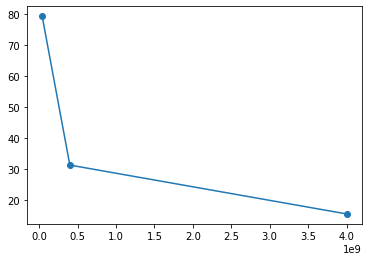

In [15]:
import matplotlib.pyplot as plt

fig, (ax) = plt.subplots(1,1)
ax.plot([output_1['n_muss'][0],output_2['n_muss'][0],output_3['n_muss'][0]],
        [np.mean(output_1['Oxy']),np.mean(output_2['Oxy']),np.mean(output_3['Oxy'])],'o-')

A cleaner way to do the same plot would be:

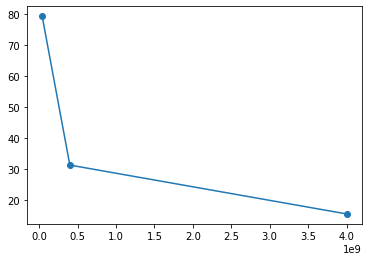

In [16]:
import matplotlib.pyplot as plt

mussel_densities = [output_1['n_muss'][0],output_2['n_muss'][0],output_3['n_muss'][0]]
oxygen_means = [np.mean(output_1['Oxy']),np.mean(output_2['Oxy']),np.mean(output_3['Oxy'])]

fig, (ax) = plt.subplots(1,1)
ax.plot(mussel_densities,oxygen_means,'o-')

An even facier way to do the same job (using a loop) would be:


Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!


Text(0, 0.5, 'Mean Oxygen Concentration (mmol O2)')

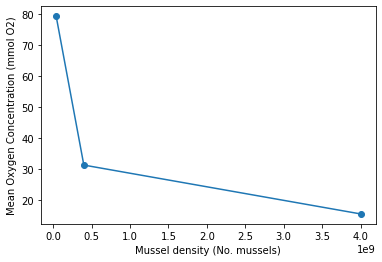

In [19]:
import model_NPZD2_SHELLE_pond_O2 as model

days, dt, par, InitCond = model.load_defaults()

par['X'] = 2000.# Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']

mussel_densities = [4 * 10**7, 4 * 10**8, 4 * 10**9]
oxygen_means = []

for density in mussel_densities:
    InitCond['n_muss'] = density  # number of mussels in basin  
    output = model.run(days,dt,InitCond,par) # This runs model and saves the output
    oxygen_means.append(np.mean(output['Oxy'])) # Appends the mena oxygen concentration to "oxygen_means"

fig, (ax) = plt.subplots(1,1)
ax.plot(mussel_densities,oxygen_means,'o-')
ax.set_xlabel('Mussel density (No. mussels)')
ax.set_ylabel('Mean Oxygen Concentration (mmol O2)')